In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def video2sequence(video_path, output_dir):
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
    cap = cv2.VideoCapture(video_path)
    index = 0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            cv2.imwrite(os.path.join(output_dir, f'{index}.png'), frame)
            index+= 1
        else:
            break

    cap.release()


In [3]:
import torch

ModuleNotFoundError: No module named 'torch'

In [4]:
video2sequence('/Users/artem/Desktop/Dmitry_laser/data/cam1.mp4','data/stored_data')

KeyboardInterrupt: 

In [5]:
imgs_dir = 'data/stored_data'

imgs_list = os.listdir(imgs_dir)
for name in sorted(imgs_list)[0:1]:
    image = cv2.imread(os.path.join(imgs_dir,name))
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # plt.imshow(image)
    # plt.show()
    

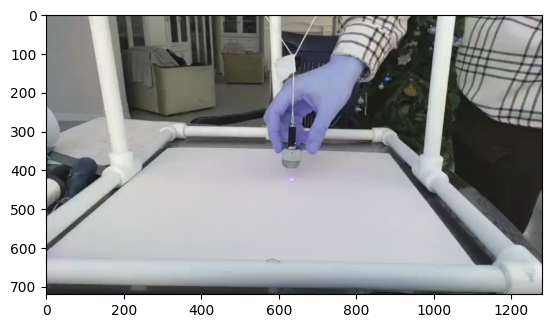

In [6]:
plt.imshow(image)

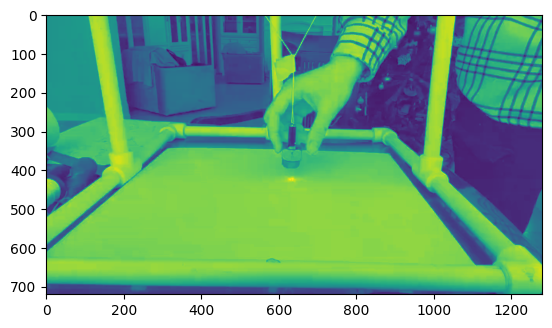

In [7]:
plt.imshow(image[:,:,2])

In [8]:
red_mask = image[:,:,2]
green_mask = image[:,:,1]
blue_mask = image[:,:,0]

In [9]:
red_mask.shape

(720, 1280)

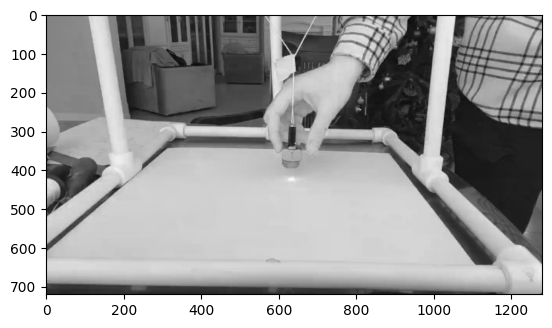

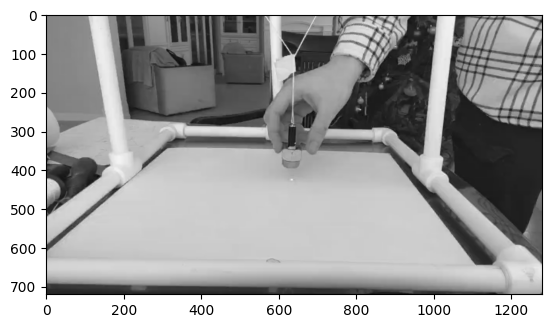

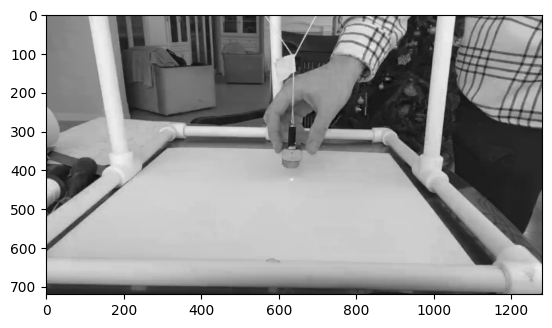

In [10]:
plt.imshow(cv2.cvtColor(red_mask,cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(green_mask,cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(blue_mask,cv2.COLOR_GRAY2RGB))
plt.show()

In [11]:
red_mask.shape

attention = np.zeros_like(red_mask)
attention[150:550,300:1100] = 1
# red_mask = red_mask * attention

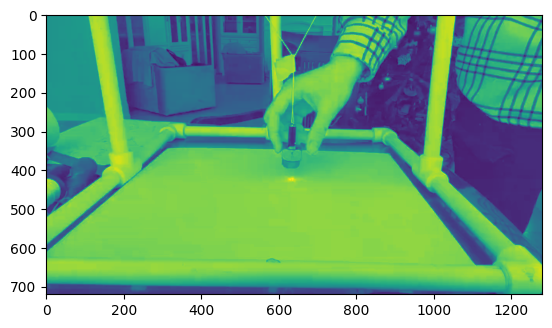

In [13]:
plt.imshow(red_mask[:,:])
#p1 [300,350]
#p2 [900, 350]
#p3 [0, 600]
#p4 [1100,650]

# h = 31, w = 37

In [12]:
init_pts = np.array([
    [402, 210],
    [1002, 223],
    [318, 615 ],
    [1150, 613]
]).astype(np.float32)
h = 31
w = 37
ppu = 10

dst_pts = np.array([
    [0,0],
    [0,w*ppu],
    [h*ppu, 0],
    [h*ppu, w*ppu]
    

]).astype(np.float32)

In [13]:
init_pts

array([[ 402.,  210.],
       [1002.,  223.],
       [ 318.,  615.],
       [1150.,  613.]], dtype=float32)

In [14]:
matrix = cv2.getPerspectiveTransform(init_pts, dst_pts)

In [15]:
matrix

array([[-2.78796896e-02,  1.28675490e+00, -2.59010894e+02],
       [ 7.14345147e-01,  1.48160475e-01, -3.18280449e+02],
       [-9.71000561e-05,  1.16994363e-03,  1.00000000e+00]])

In [16]:
dist = cv2.warpPerspective(image, matrix, dsize=(ppu*h,ppu*w))

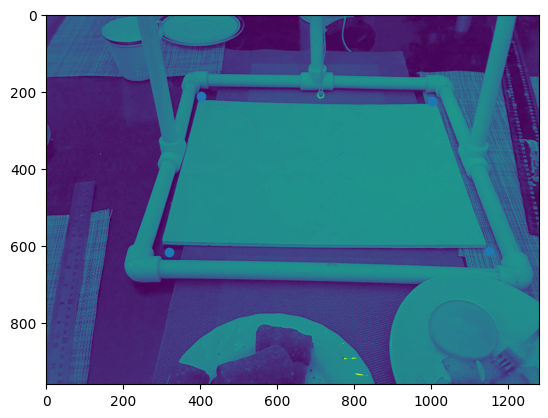

In [17]:
plt.imshow(red_mask)
plt.scatter(init_pts[:,0], init_pts[:,1])
plt.show()

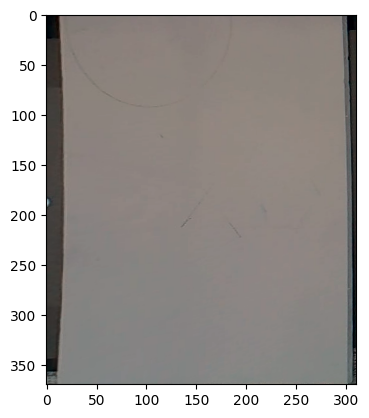

In [18]:
plt.imshow(dist)

In [19]:
def make_transform(image, init_pts, h,w, ppu):
    
    dst_pts = np.array([
        [0,0],
        [0,w*ppu],
        [h*ppu, 0],
        [h*ppu, w*ppu]
        

    ]).astype(np.float32)
    init_pts = init_pts.astype(np.float32)
    matrix = cv2.getPerspectiveTransform(init_pts, dst_pts)
    dist = cv2.warpPerspective(image, matrix, dsize=(ppu*h,ppu*w))
    return dist.transpose(1,0,2)

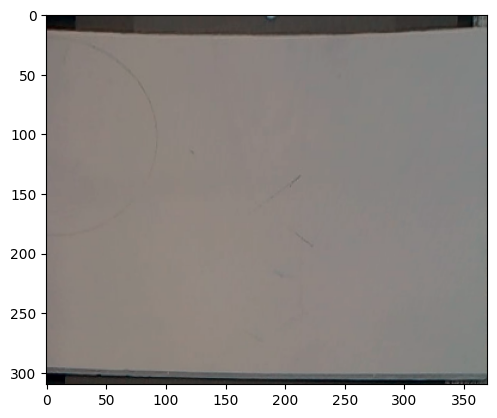

In [20]:
plt.imshow(make_transform(image, init_pts, 31,37,10))